In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1dKDbIRYiiohz9YCGeWJnIaVcROORupNM

Downloading...
From: https://drive.google.com/uc?id=1dKDbIRYiiohz9YCGeWJnIaVcROORupNM
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 17.5MB/s]


In [3]:
areofit_df = pd.read_csv("aerofit_treadmill.csv")

In [4]:
areofit_df = pd.DataFrame(areofit_df)
areofit_df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Initial Analysis

In [5]:
areofit_df.shape

(180, 9)

Data Set has 180 rows and 9 coloumns

In [6]:
areofit_df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


The Given Data has the below mentioned Features
*   There are Three unique products of Aerofit
*   Max Age is 50
*   MAX income is 104581
*   Highest miles is 360
*   There are two marital status that is Partnered and Single
*   top selling produyct is KP281 and the no of it sold are 80
*   Most of the customers are Male who are 104 out of 180





In [7]:
areofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The data types of the coloumns is as given above

In [8]:
areofit_df.isna().value_counts()

,,,,,,,,,count
Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,
False,False,False,False,False,False,False,False,False,180


There is no null values present in any coloumns

In [9]:
areofit_df.duplicated().value_counts()

,count
False,180


There is no duplicate data present in the given data set

In [10]:
areofit_df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

We have mainly three types of product that are 'KP281', 'KP481' and 'KP781'

In [11]:
areofit_df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


out of the total 180 customer 104 are males and 76 are females

In [12]:
areofit_df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


out of the 180 customers 107 are Married and 73 are singles customers

In [13]:
areofit_df['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


unique Educations and its count

In [14]:
areofit_df['Fitness'].value_counts().sort_index()

,count
Fitness,
1,2
2,26
3,97
4,24
5,31


We have five category of fitness and we can see that fitness of category 3 is highest

Converting the Fitness to a given category based on the fitness index


*   1=>Very Poor Fitness
*   2=>Poor Fitness
*   3=>Average Fitness
*   4=>Good Fitness
*   5=>Very Good Fitness








In [15]:
aerofittm_df=areofit_df
def fitnesscategorydriver(data):
  if(data==1):
    return "Very Poor"
  elif(data==2):
    return "Poor"
  elif(data==3):
    return "Average"
  elif(data==4):
    return "Good"
  elif(data==5):
    return "Very Good"

aerofittm_df['Fitness_category']=aerofittm_df['Fitness'].apply(fitnesscategorydriver)
aerofittm_df=pd.DataFrame(aerofittm_df)
aerofittm_df['Fitness_category'].value_counts()

,count
Fitness_category,
Average,97
Very Good,31
Poor,26
Good,24
Very Poor,2


# **Univariate Analysis**

Product sold analysis of Aerofit

The count of unique product sold are as listed below
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


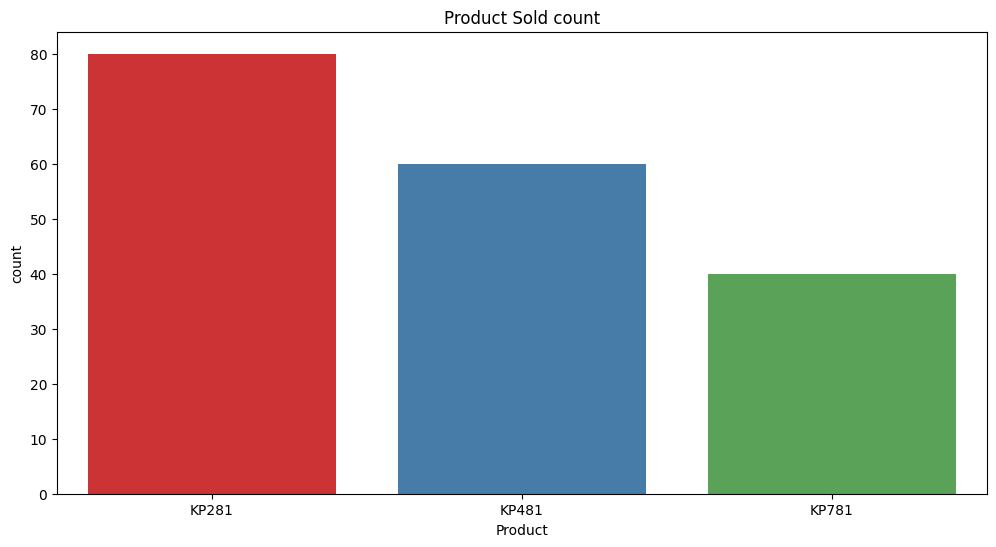

In [16]:
def productssoldcount(data):
  print("The count of unique product sold are as listed below")
  print(data['Product'].value_counts())
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='Product', hue='Product', palette='Set1', legend=False)
  plt.title("Product Sold count")
  plt.xlabel("Product")
  plt.ylabel("count")
  plt.show()

productssoldcount(aerofittm_df)

we can say that the highest no of products sold is KP281

Gender based analysis on the treadmills purchased

Gender count of the customer who brought the product
Gender
Male      104
Female     76
Name: count, dtype: int64


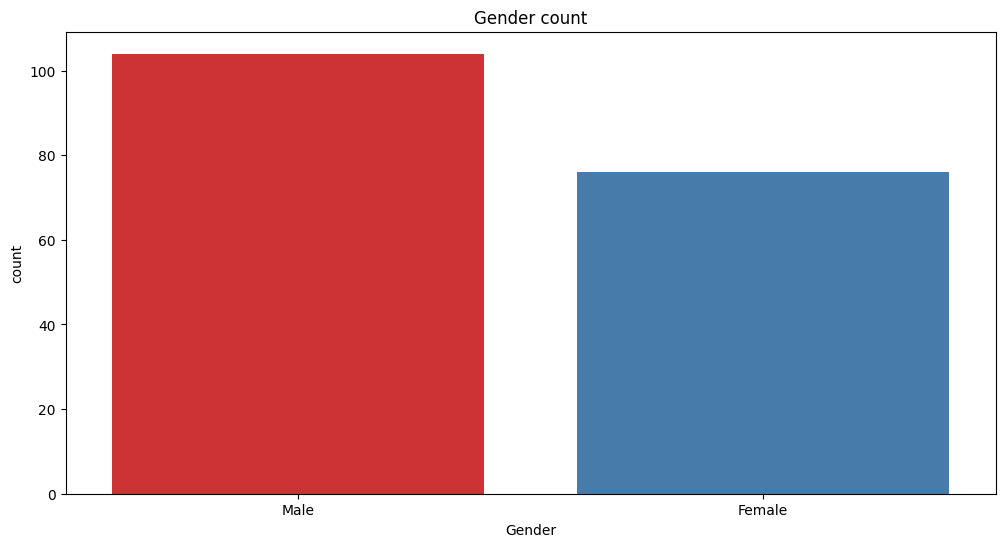

In [17]:
def genderspurchcount(data):
  print("Gender count of the customer who brought the product")
  print(data['Gender'].value_counts())
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='Gender', hue='Gender', palette='Set1', legend=False)
  plt.title("Gender count")
  plt.xlabel("Gender")
  plt.ylabel("count")
  plt.show()

genderspurchcount(aerofittm_df)

We have more male customer which accounts to about 104

Marital status based analysis on the treadmills purchased

Maritial count
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


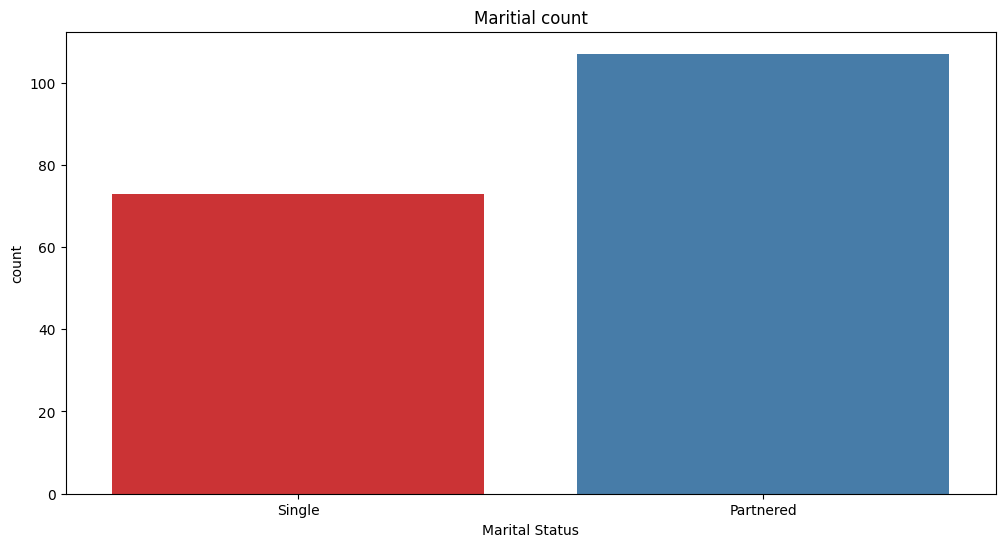

In [18]:
def maritialbasedcount(data):
  print("Maritial count")
  print(data['MaritalStatus'].value_counts())
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='MaritalStatus', hue='MaritalStatus', palette='Set1', legend=False)
  plt.title("Maritial count")
  plt.xlabel("Marital Status")
  plt.ylabel("count")
  plt.show()

maritialbasedcount(aerofittm_df)

Most of the customers who have purchased the treadmill are married and account of 107 in total

Fitness category analysis

Count of Fitness category they belong to
Fitness_category
Average      97
Very Good    31
Poor         26
Good         24
Very Poor     2
Name: count, dtype: int64


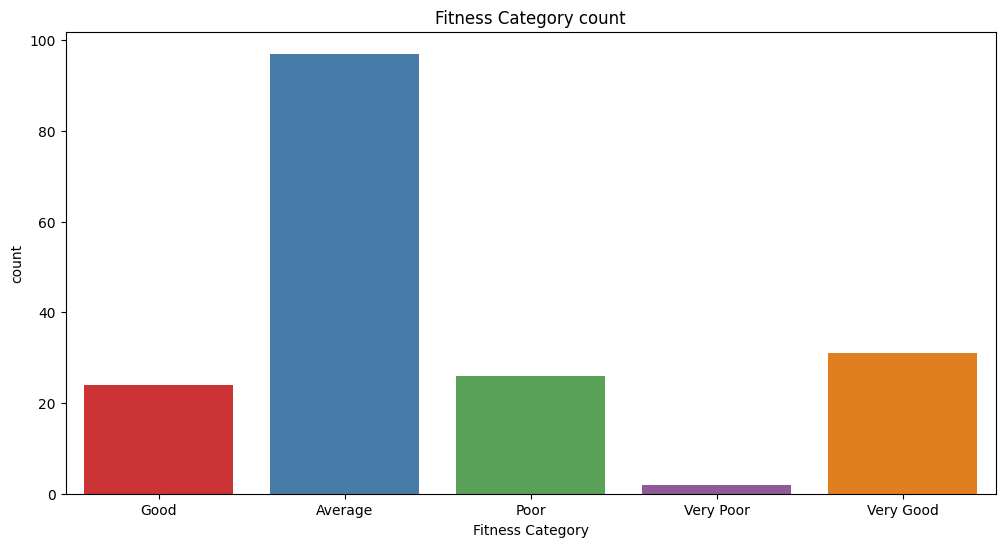

In [19]:
def fitnesscategorybasedcount(data):
  print("Count of Fitness category they belong to")
  print(data['Fitness_category'].value_counts())
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='Fitness_category', hue='Fitness_category', palette='Set1', legend=False)
  plt.title("Fitness Category count")
  plt.xlabel("Fitness Category")
  plt.ylabel("count")
  plt.show()

fitnesscategorybasedcount(aerofittm_df)

Most of the customer who bought the treadmill are of average fitness

Analysis on the Income

Income based distribution
Income
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: count, Length: 62, dtype: int64


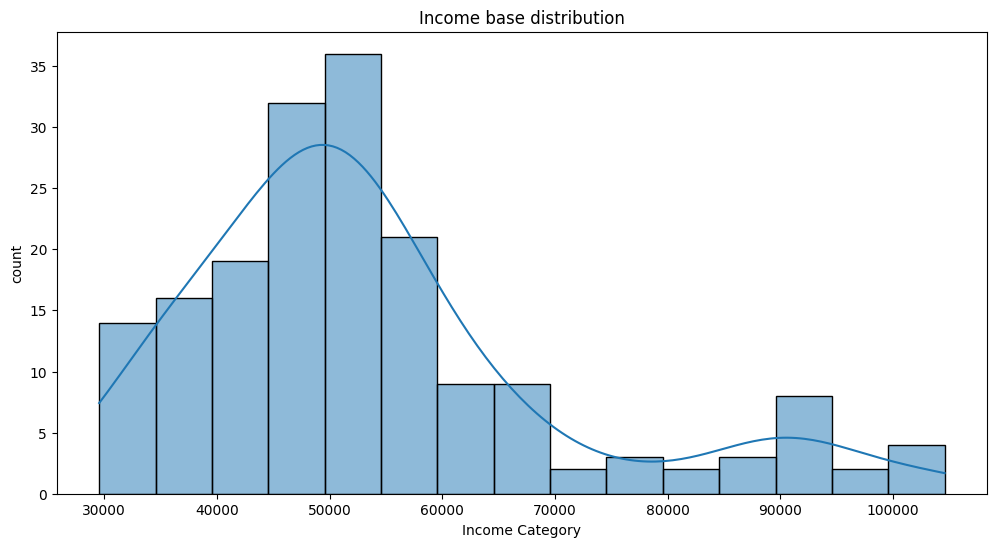

In [20]:
def fitnessincomecount(data):
  print("Income based distribution")
  print(data['Income'].value_counts())
  plt.figure(figsize=(12,6))
  sns.histplot(data=data, x='Income', kde=True)
  plt.title("Income base distribution")
  plt.xlabel("Income Category")
  plt.ylabel("count")
  plt.show()

fitnessincomecount(aerofittm_df)

we can see that most of them have an income in the range of 45k to 50k.

In [21]:
aerofittm_df.head(4)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good
1,KP281,19,Male,15,Single,2,3,31836,75,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average
3,KP281,19,Male,12,Single,3,3,32973,85,Average


Analysis on Miles

Miles based distribution
Miles
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: count, dtype: int64


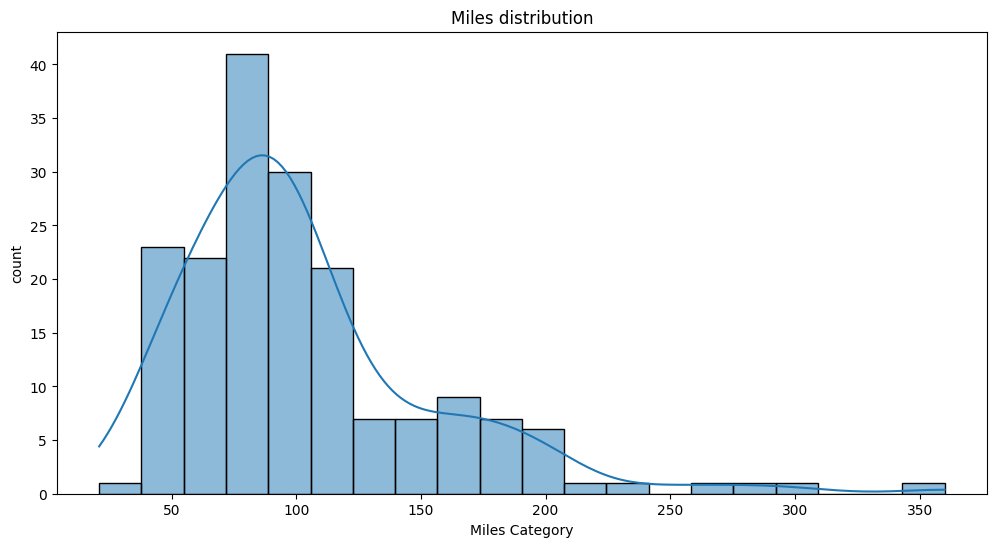

In [22]:
def fitnessMilescount(data):
  print("Miles based distribution")
  print(data['Miles'].value_counts())
  plt.figure(figsize=(12,6))
  sns.histplot(data=data, x='Miles', kde=True)
  plt.title("Miles distribution")
  plt.xlabel("Miles Category")
  plt.ylabel("count")
  plt.show()

fitnessMilescount(aerofittm_df)

This is the miles ran distribution by the customers

Usage Analysis

Usage based distribution
Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64


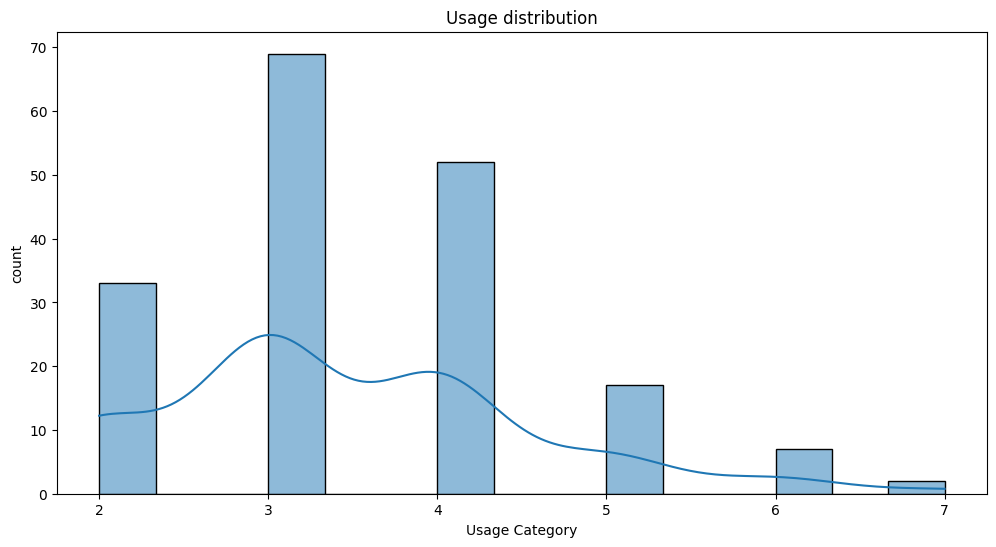

In [23]:
def fitnessUsagecount(data):
  print("Usage based distribution")
  print(data['Usage'].value_counts())
  plt.figure(figsize=(12,6))
  sns.histplot(data=data, x='Usage', kde=True)
  plt.title("Usage distribution")
  plt.xlabel("Usage Category")
  plt.ylabel("count")
  plt.show()

fitnessUsagecount(aerofittm_df)

Education Analysis

Education based distribution
Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64


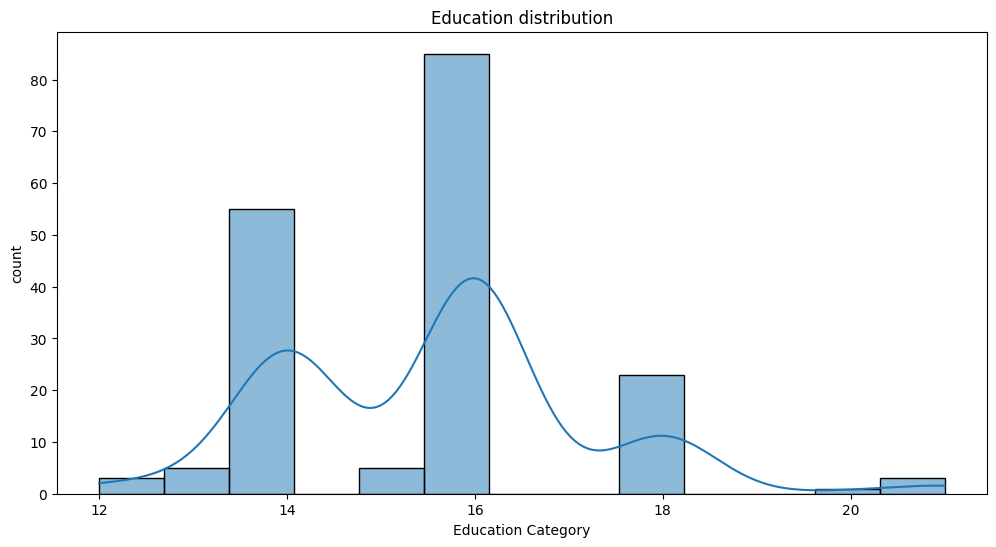

In [24]:
def fitnessEducationcount(data):
  print("Education based distribution")
  print(data['Education'].value_counts())
  plt.figure(figsize=(12,6))
  sns.histplot(data=data, x='Education', kde=True)
  plt.title("Education distribution")
  plt.xlabel("Education Category")
  plt.ylabel("count")
  plt.show()

fitnessEducationcount(aerofittm_df)

Age Analysis

In [25]:
aerofittm_df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

Based ont he above result let us categorize

*Age Categories*
*   Adolescent => 18-22
*   Young Adult => 22-25
*   Adult => 25-35
*   Middle-Aged => 35-59
*   Senior=> 60-100                                             

In [26]:
bins = [18, 22, 25, 35, 59, 100]
labels = ['Adolescent', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']

aerofittm_df['Age_Category'] = pd.cut(aerofittm_df['Age'], bins=bins, labels=labels, right=False)
print(aerofittm_df.head(10))

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   
5   KP281   20  Female         14     Partnered      3        3   32973   
6   KP281   21  Female         14     Partnered      3        3   35247   
7   KP281   21    Male         13        Single      3        3   32973   
8   KP281   21    Male         15        Single      5        4   35247   
9   KP281   21  Female         15     Partnered      2        3   37521   

   Miles Fitness_category Age_Category  
0    112             Good   Adolescent  
1     75          Average   Adolescent  
2     66          Average   Adolescent  
3     85  

Age distribution
Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64


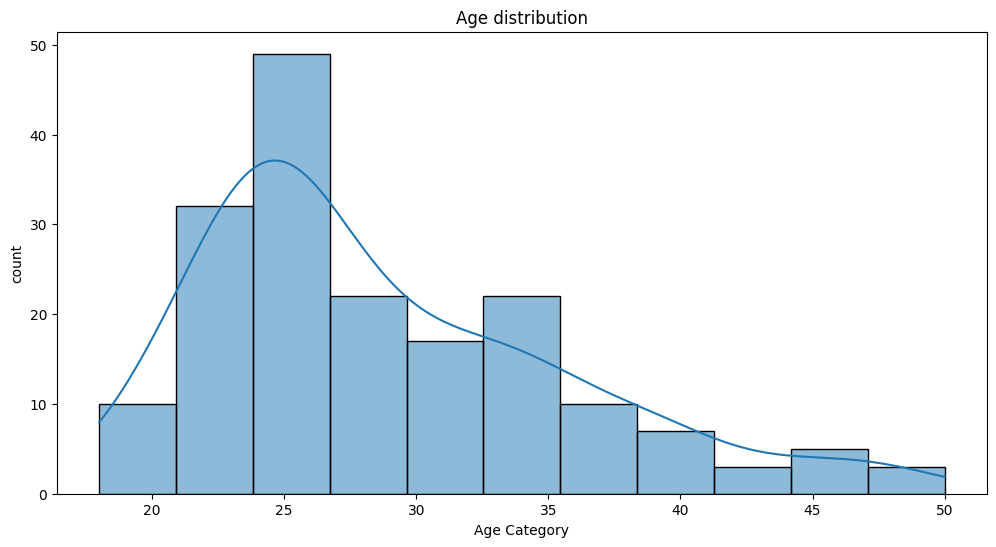

Age Category distribution
Age_Category
Adult          90
Young Adult    37
Middle-Aged    36
Adolescent     17
Senior          0
Name: count, dtype: int64


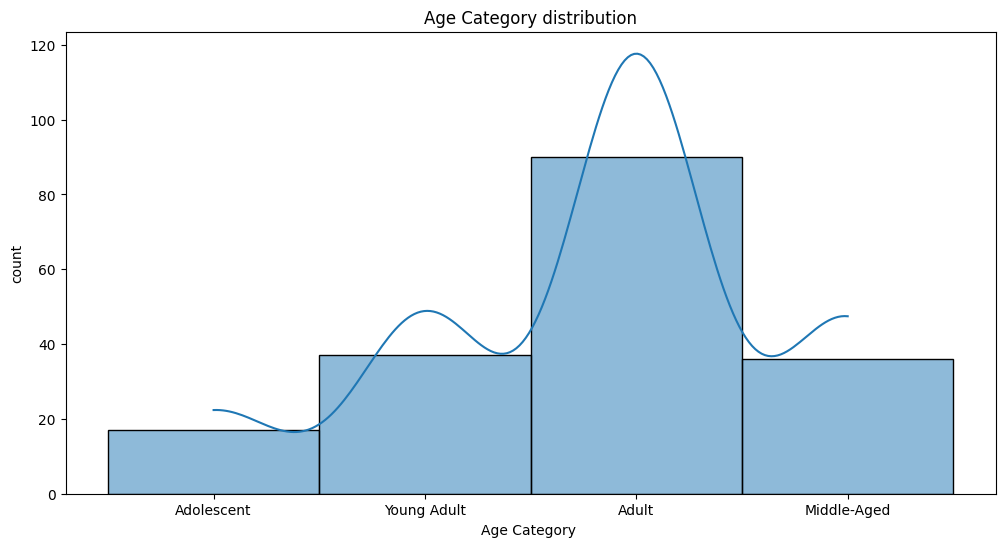

In [27]:
def fitnessagecount(data):
  print("Age distribution")
  print(data['Age'].value_counts())
  plt.figure(figsize=(12,6))
  sns.histplot(data=data, x='Age', kde=True)
  plt.title("Age distribution")
  plt.xlabel("Age Category")
  plt.ylabel("count")
  plt.show()

  print("Age Category distribution")
  print(data['Age_Category'].value_counts())
  plt.figure(figsize=(12,6))
  sns.histplot(data=data, x='Age_Category', kde=True)
  plt.title("Age Category distribution")
  plt.xlabel("Age Category ")
  plt.ylabel("count")
  plt.show()


fitnessagecount(aerofittm_df)

We can see from above most of them are of age 25 and belong to adult category

# **Outliers identification**

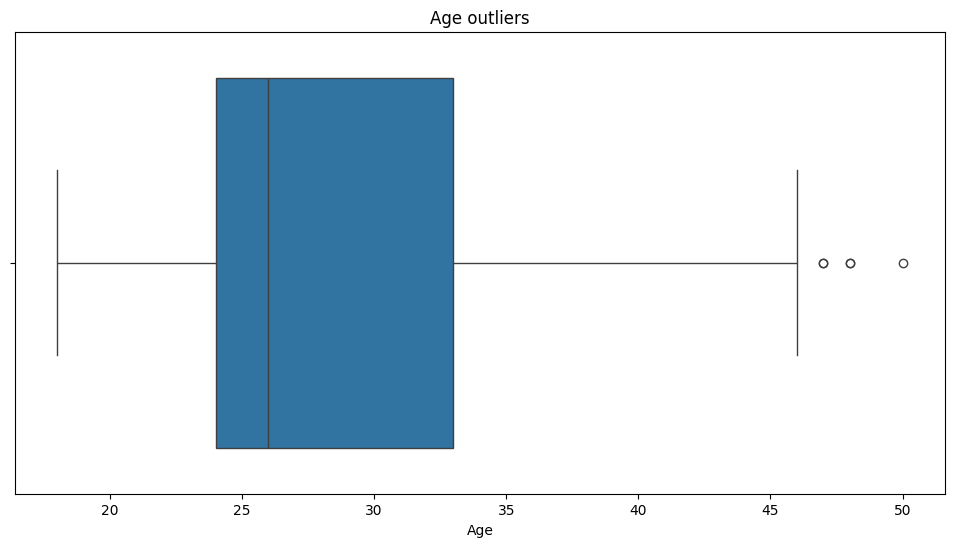

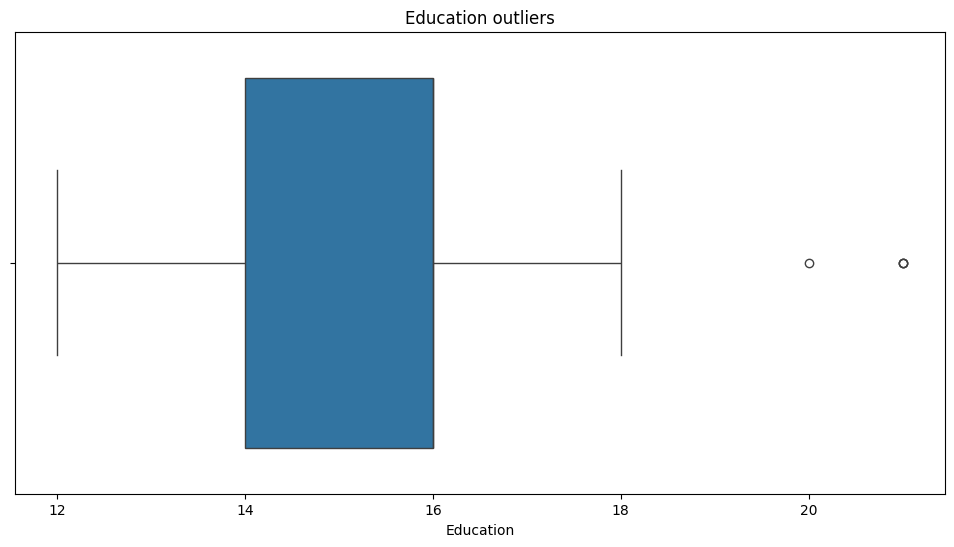

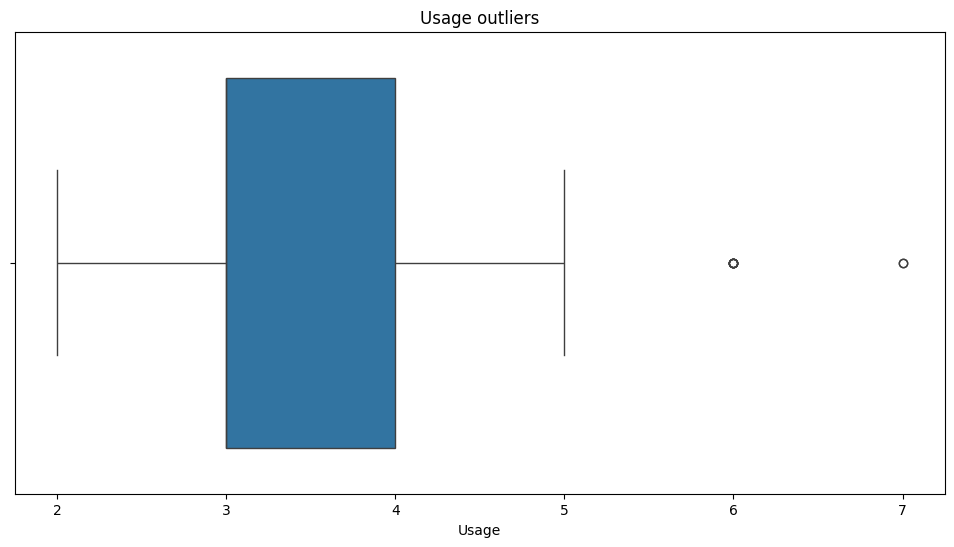

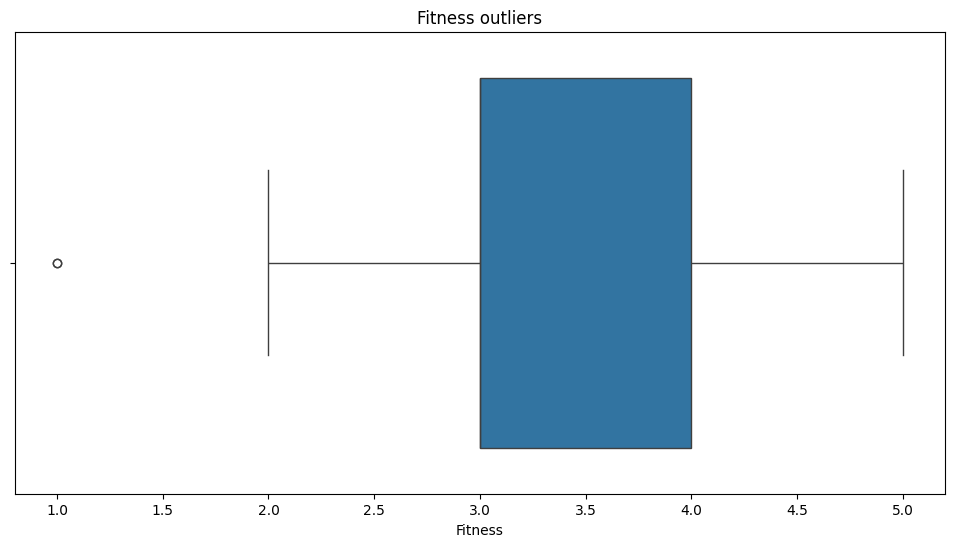

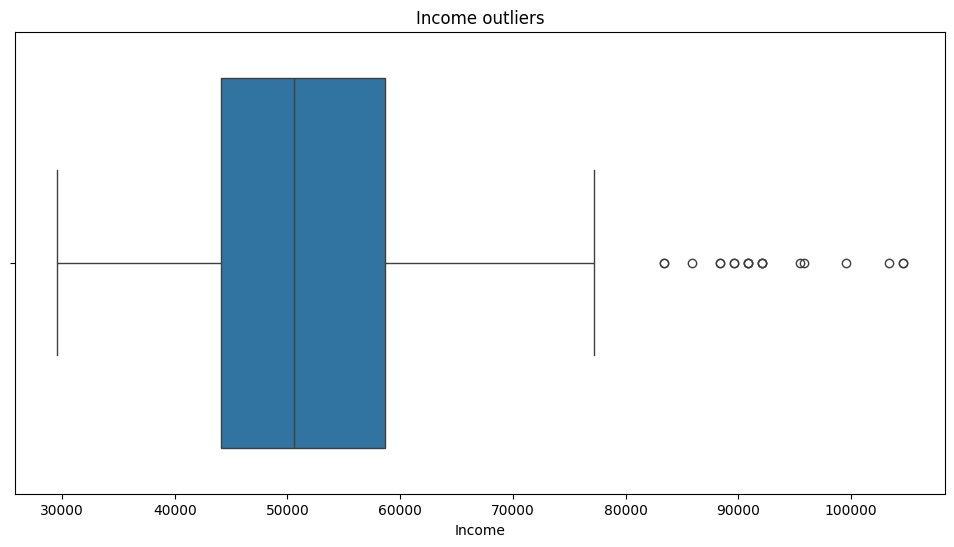

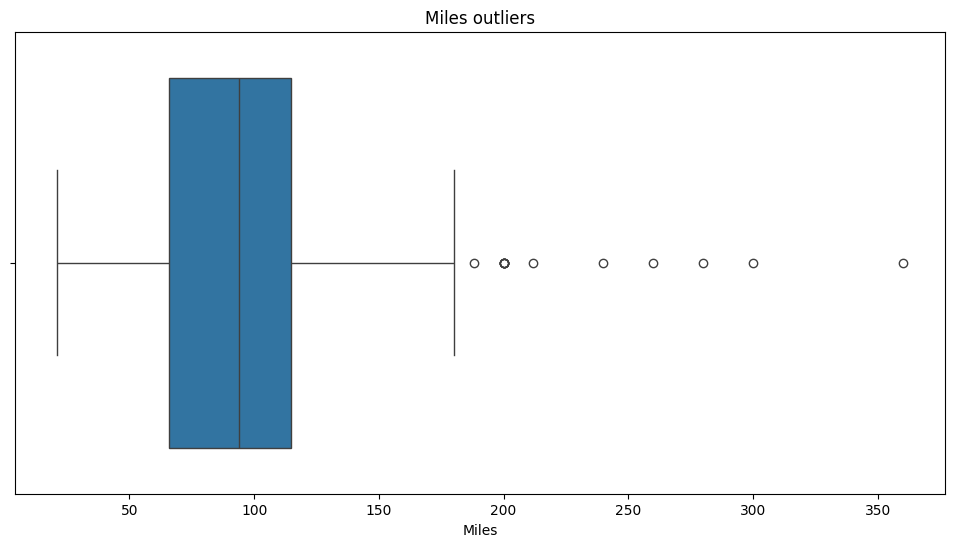

In [28]:
def fitnessagecount(data,coloumn):
  for i in coloumn:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=data, x=i)
    title=i+" outliers"
    plt.title(title)
    plt.xlabel(i)
    plt.show()

coloumn=['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fitnessagecount(aerofittm_df,coloumn)

we do have outliers present in the given data mainly in the miles and income category where anything more  than 200 miles is considered as an outlier.
Where for the income anything more 80K is considered as an outlier

Age,Education and Usuage have very few outliers. Age anything above 45 is considered as an outlier and for Education anything above 20 is an outlier and usuage of 6 or above is considered as an outlier

# **HeatMaps for Correlation**

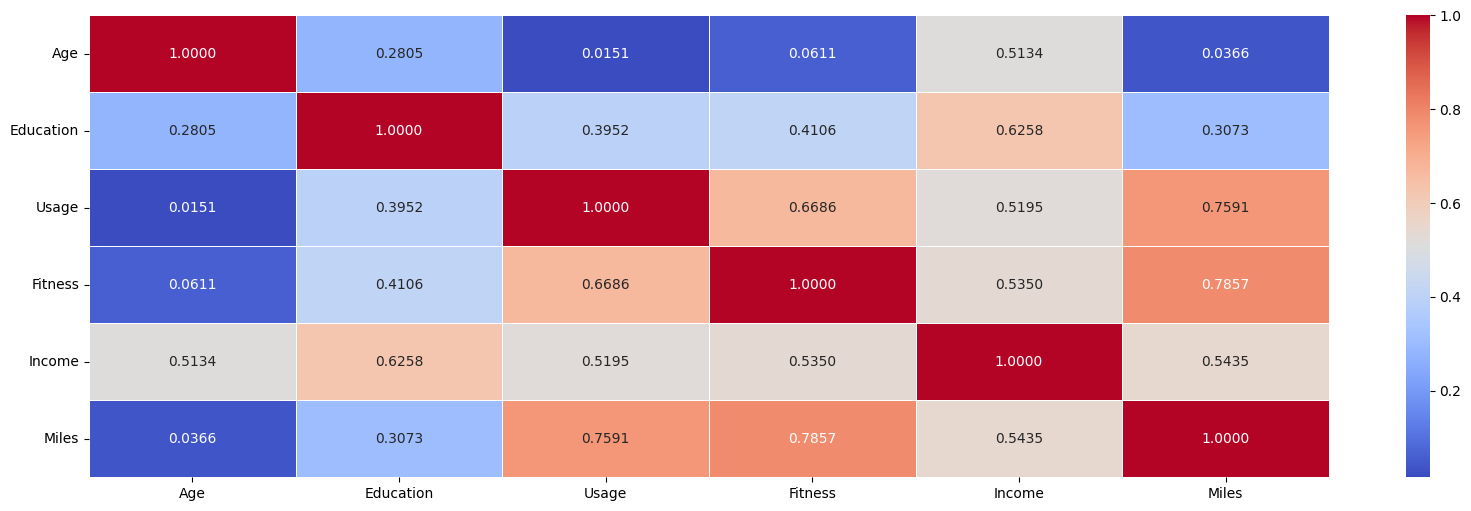

In [29]:
plt.figure(figsize=(20,6))
aerofittmf_df=aerofittm_df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]
sns.heatmap(aerofittmf_df.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap
Correlation between Age and Miles is 0.0366
Correlation between Education and Income is 0.6258
Correlation between Usage and Fitness is 0.6686
Correlation between Fitness and Age is 0.0611
Correlation between Income and Usage is 0.5195
Correlation between Miles and Age is 0.0366

<Figure size 2000x600 with 0 Axes>

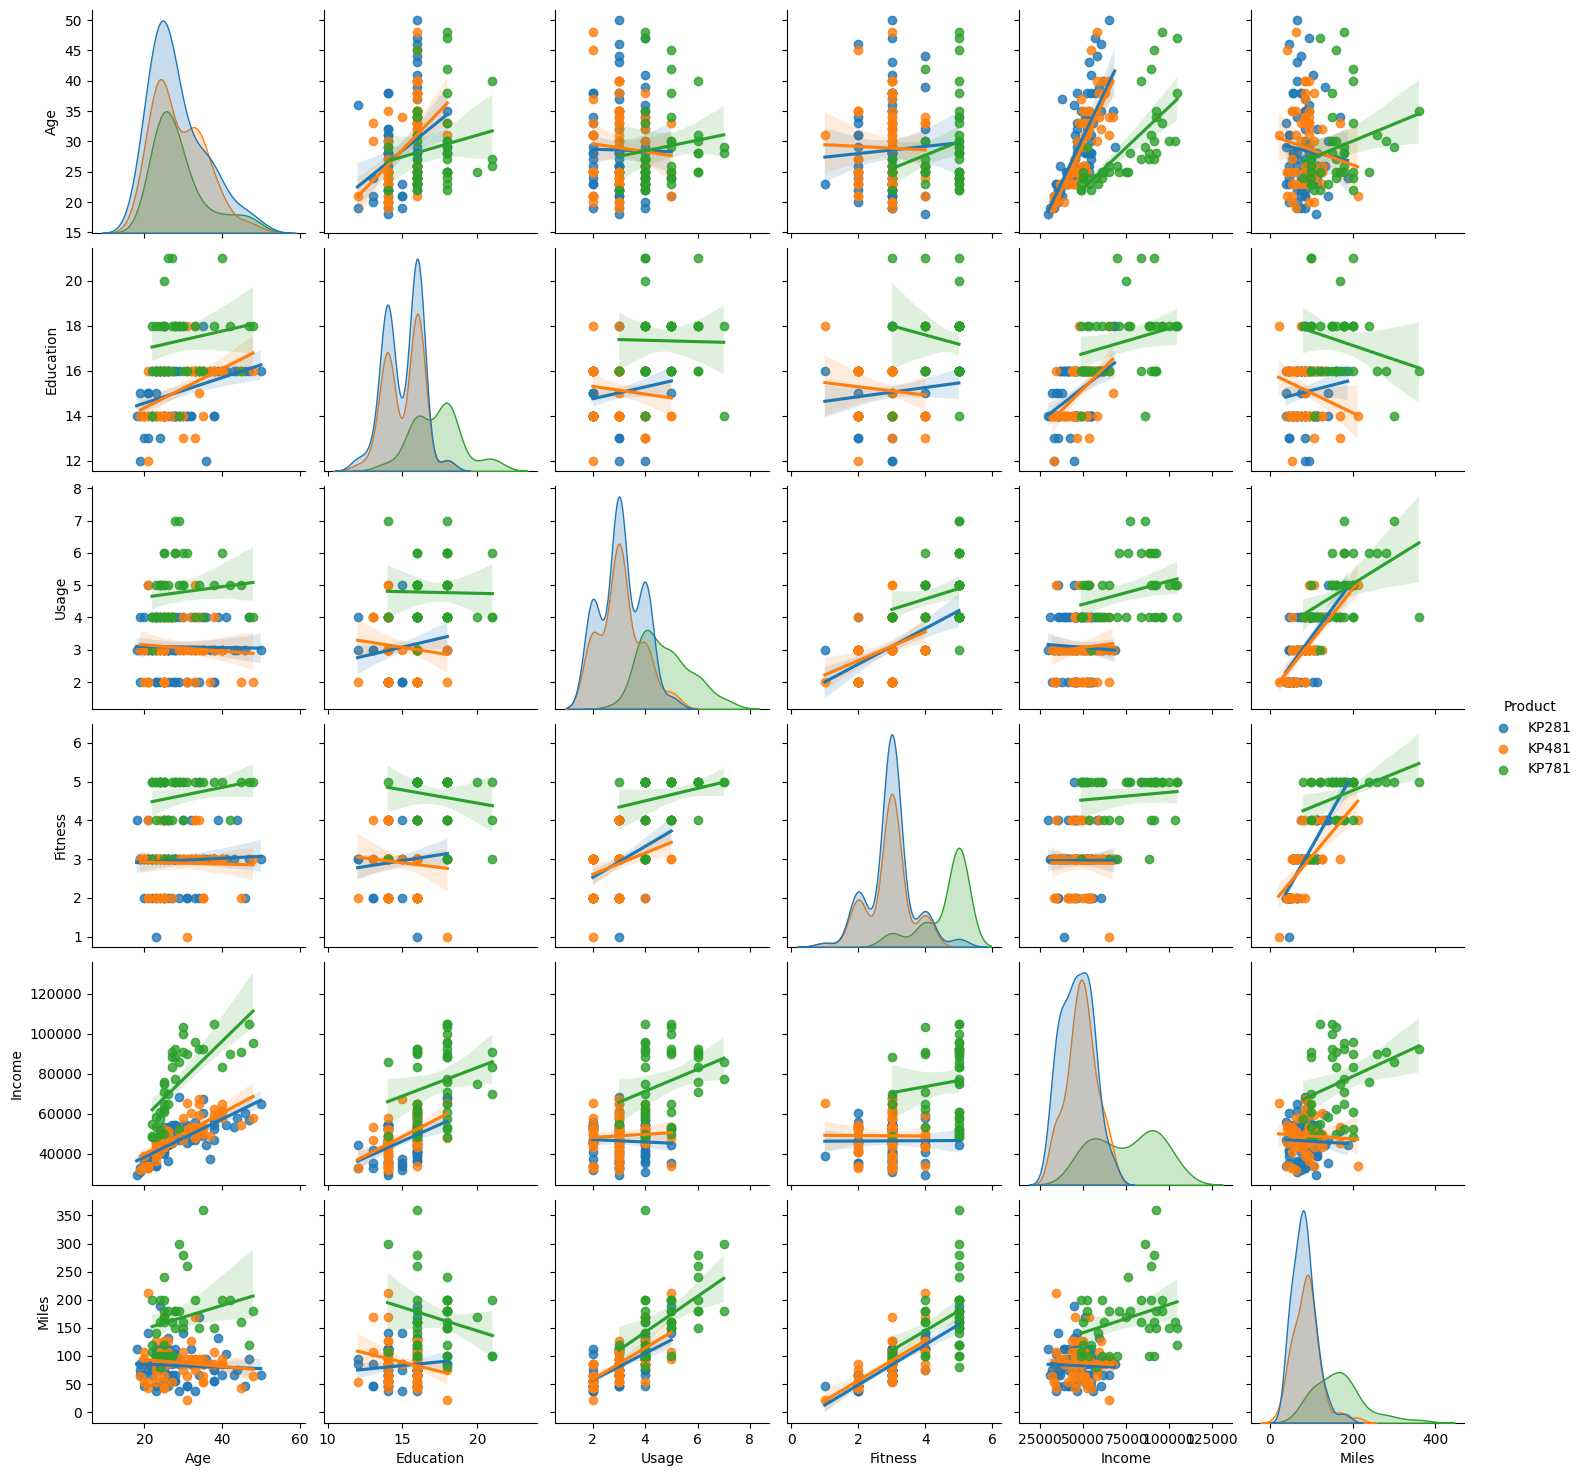

<Figure size 2000x600 with 0 Axes>

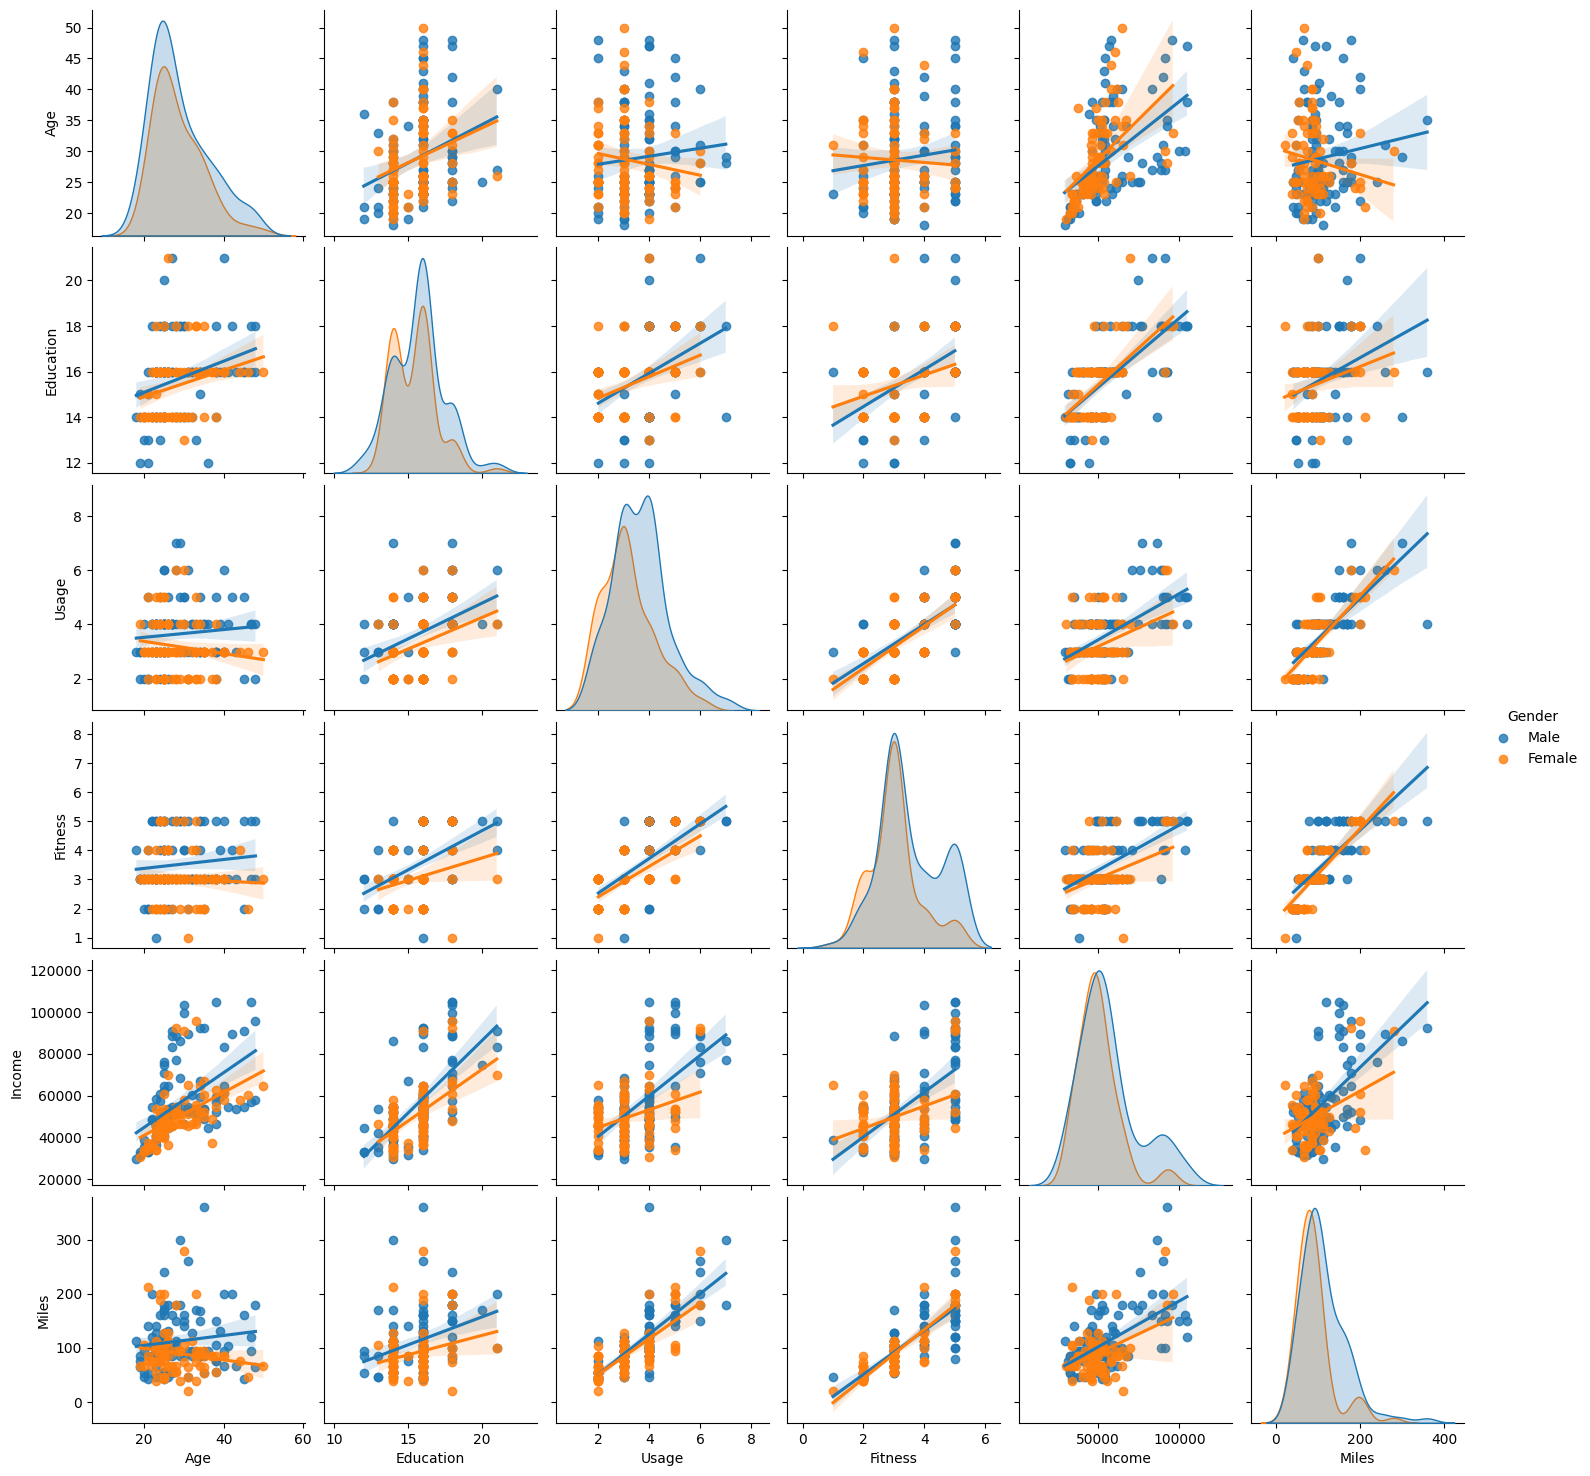

<Figure size 2000x600 with 0 Axes>

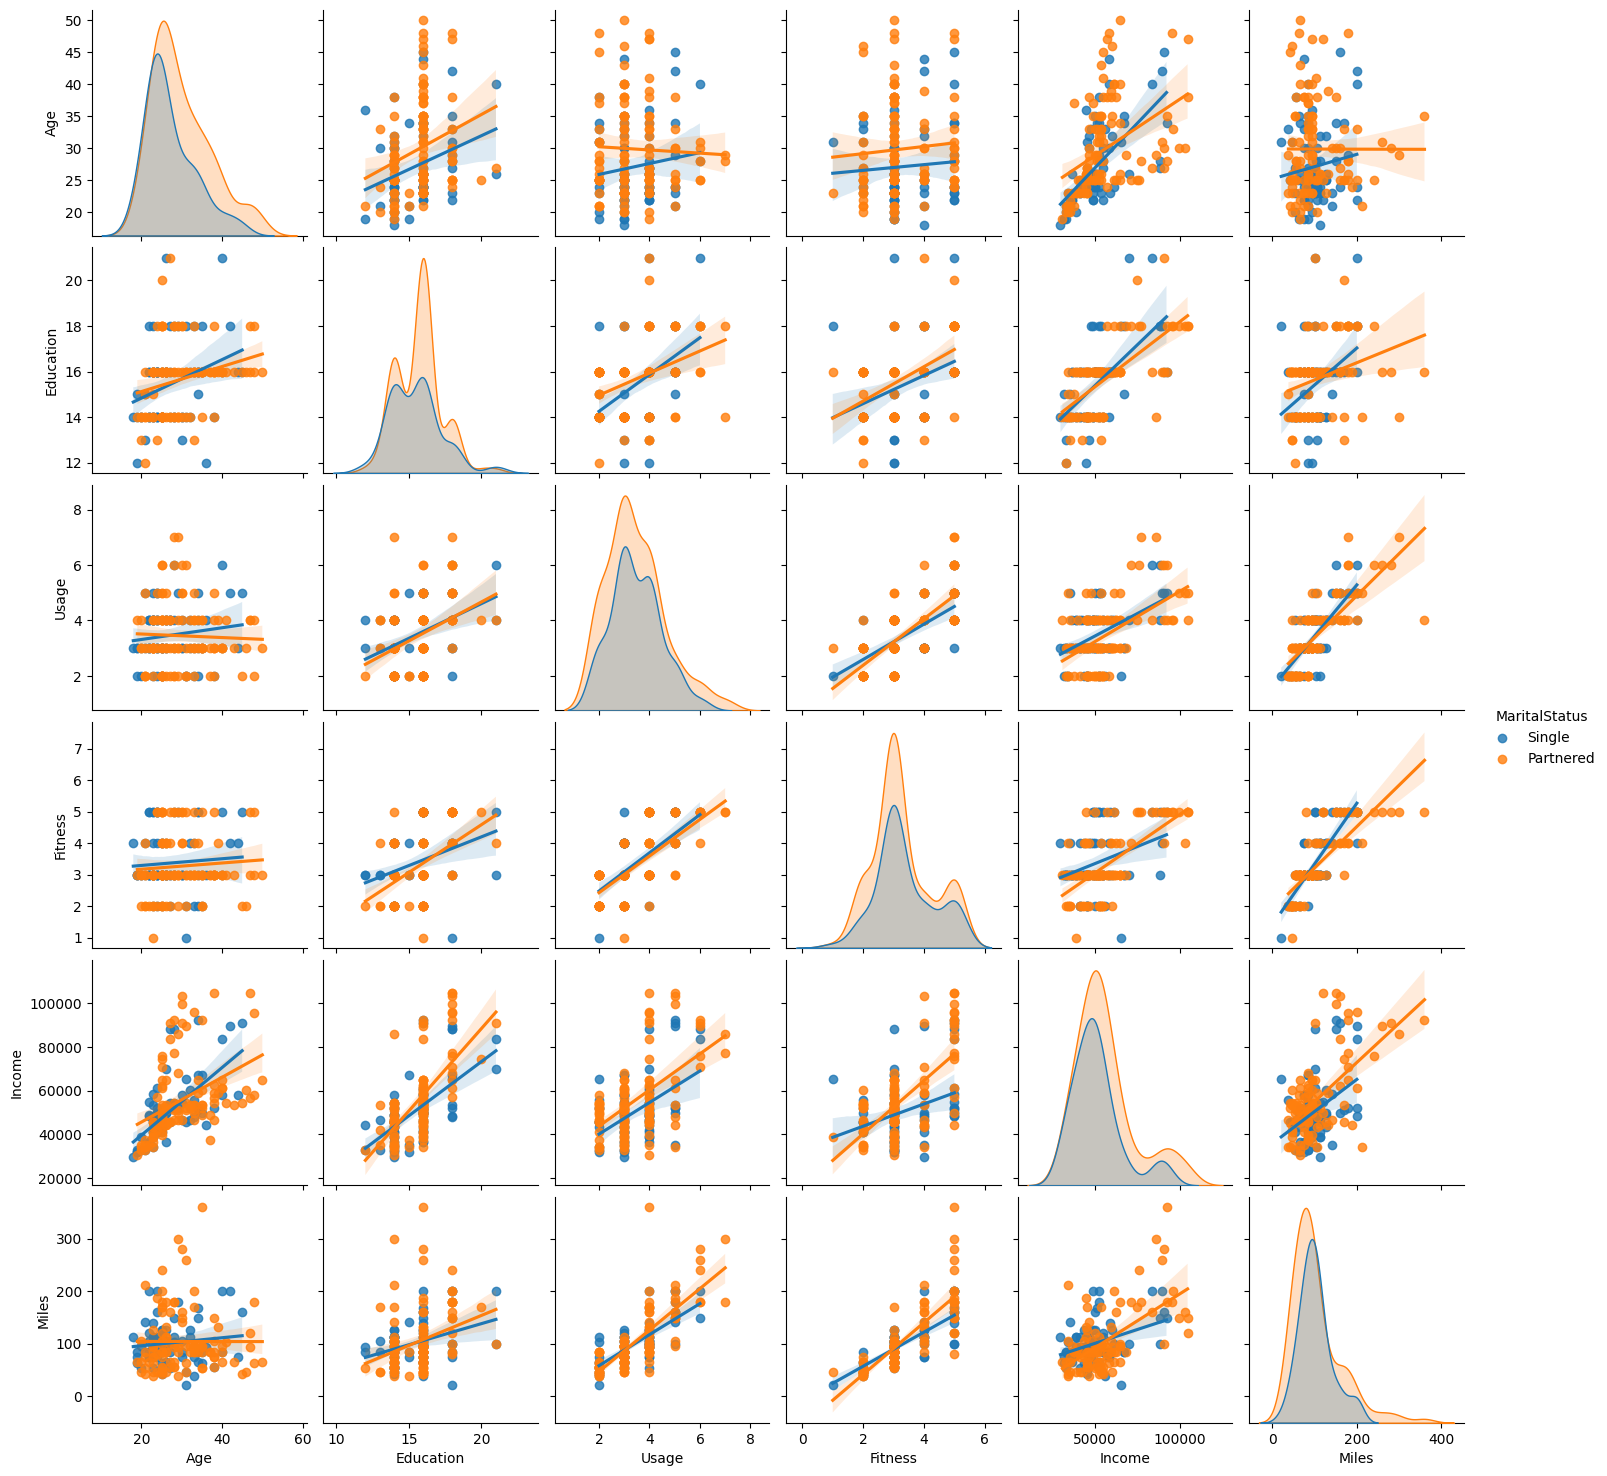

In [30]:
coloumn=['Product', 'Gender', 'MaritalStatus']
for i in coloumn:
  plt.figure(figsize=(20,6))
  sns.pairplot(aerofittm_df,hue=i ,kind='reg')
  plt.show()

# **Bivarent Analysis**

Analysis with respect to product and Age,Education.usage,Fitness and Miles

In [31]:
coloumns = ['Age', 'Education', 'Usage', 'Fitness', 'Miles']
for i in coloumns:
  print("Analysis on "+i)
  print("")
  print(aerofittm_df.groupby('Product')[i].mean())
  print("")

Analysis on Age

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

Analysis on Education

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

Analysis on Usage

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

Analysis on Fitness

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

Analysis on Miles

Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64



Observation

Product and Age
*   Mean Age of the customer who purchased product KP281 is 28.55
*   Mean Age of the customer who purchased product KP481 is 28.90
*   Mean Age of the customer who purchased product KP781 is 29.10

Product and Education
*   Mean Education qualification of the customer who purchased product KP281 is 15.03
*   Mean Education qualification of the customer who purchased product KP481 is 15.11
*   Mean Education qualification of the customer who purchased product KP781 is 17.32

Product and Usage
*   Customer usage mean for product KP281 is 3.08
*   Customer usage mean for product KP481 is 3.06
*   Customer usage mean for product KP781 is 4.77

Product and Fitness

*   Customer fitness mean for product KP281 is 2.96
*   Customer fitness mean for product KP481 is 2.90
*   Customer fitness mean for product KP781 is 4.62

Product and Miles

*   Customer miles mean for product KP281 is 82.78
*   Customer miles mean for product KP481 is 87.93
*   Customer miles mean for product KP781 is 166.90


We will further analyze on product vs rest of the coloumns as  mentioned below
*   Product vs Age
*   Product vs Gender
*   Product vs Education
*   Product vs Marital Status
*   Product vs Usage
*   Product vs Fitness
*   Product vs Income
*   Product vs Miles


Product Vs Age

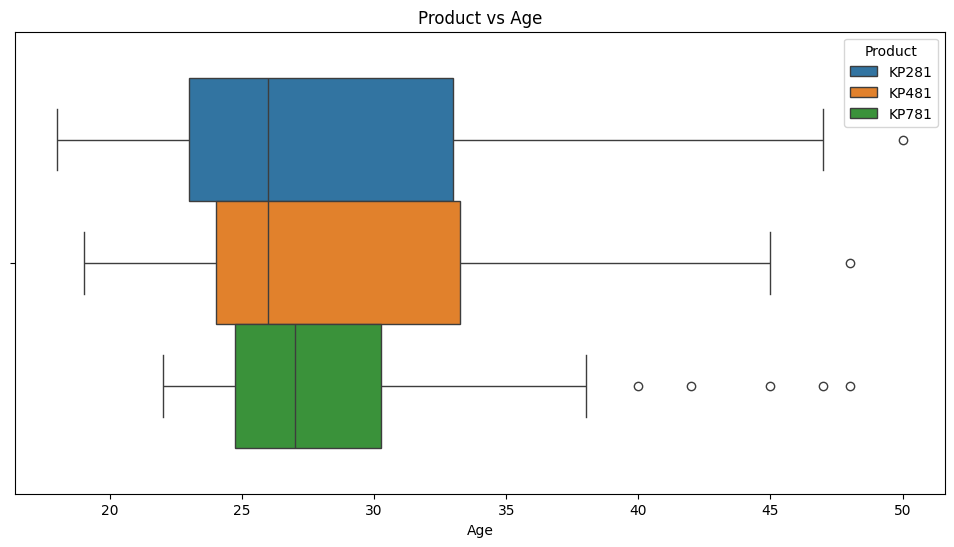

In [33]:
def productvsage(data):
  plt.figure(figsize=(12,6))
  sns.boxplot(data=data, x='Age', hue='Product')
  title="Product vs Age"
  plt.title(title)
  plt.xlabel("Age")
  plt.show()

productvsage(aerofittm_df)

Most of the people who brought KP281 are within the age of 20 to 48 and average age of 26
Most of the people who brought KP481 are within the age of 20 to 45 and average age of 26
Most of the people who brought KP481 are within the age of 22 to 38 and average age of 28

Product vs Gender

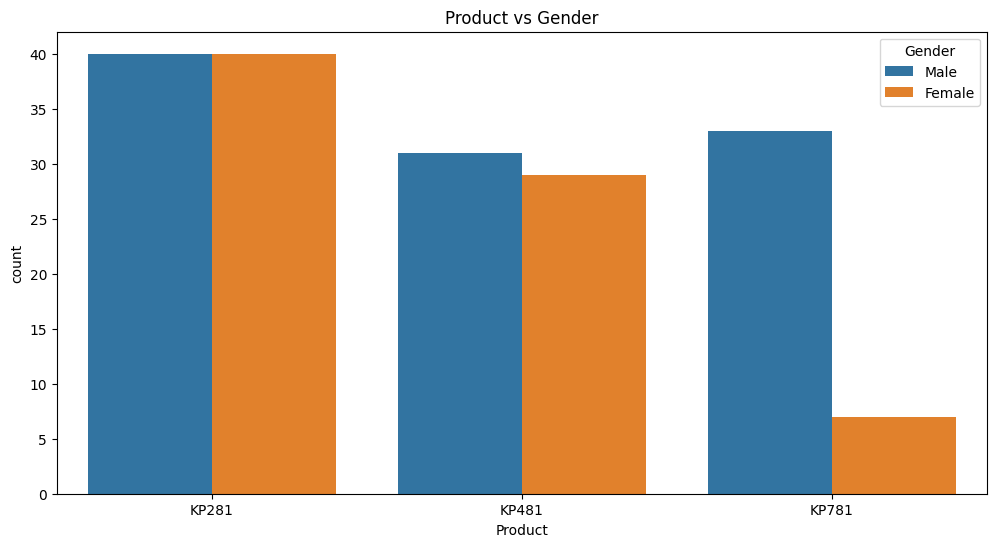

In [34]:
def productvsgender(data):
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='Product', hue='Gender')
  title="Product vs Gender"
  plt.title(title)
  plt.xlabel("Product")
  plt.show()

productvsgender(aerofittm_df)

Both male and female have purchased the product KP281 the same
Male have purchased the product KP481 more
Males have purchased the product KP781 significantly more

Product Vs Education

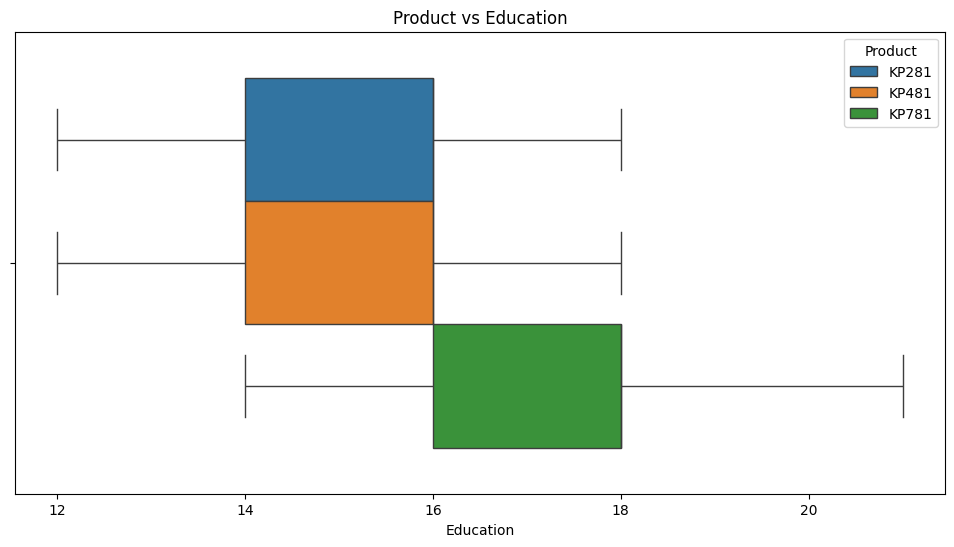

In [35]:
def productvsage(data):
  plt.figure(figsize=(12,6))
  sns.boxplot(data=data, x='Education', hue='Product')
  title="Product vs Education"
  plt.title(title)
  plt.xlabel("Education")
  plt.show()

productvsage(aerofittm_df)

People who have purchased the product KP281 and KP481 seems to have the same education trend
People who have purchased the product KP781 seem to be on the higher educated background

Product Vs Marital Status

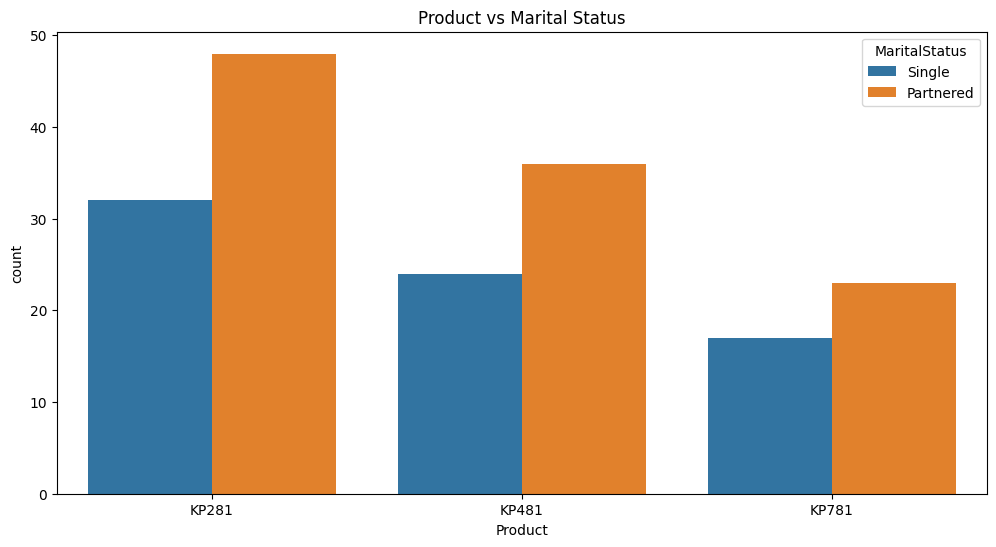

In [36]:
def productvsmarriage(data):
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='Product', hue='MaritalStatus')
  title="Product vs Marital Status"
  plt.title(title)
  plt.xlabel("Product")
  plt.show()

productvsmarriage(aerofittm_df)

The product KP281 is used by Married people more than that of the single ones and are significantly large compared to KP481 and KP781 as seen above

Product vs Usage

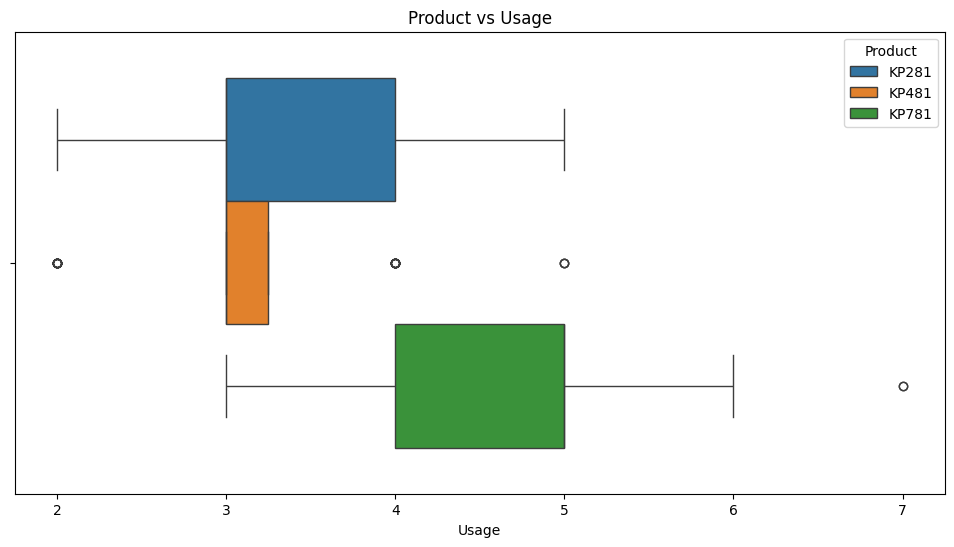

In [37]:
def productvsUsage(data):
  plt.figure(figsize=(12,6))
  sns.boxplot(data=data, x='Usage', hue='Product')
  title="Product vs Usage"
  plt.title(title)
  plt.xlabel("Usage")
  plt.show()

productvsUsage(aerofittm_df)

We have KP281 and KP781 usage as more compared to that of KP481

Product vs Fitness

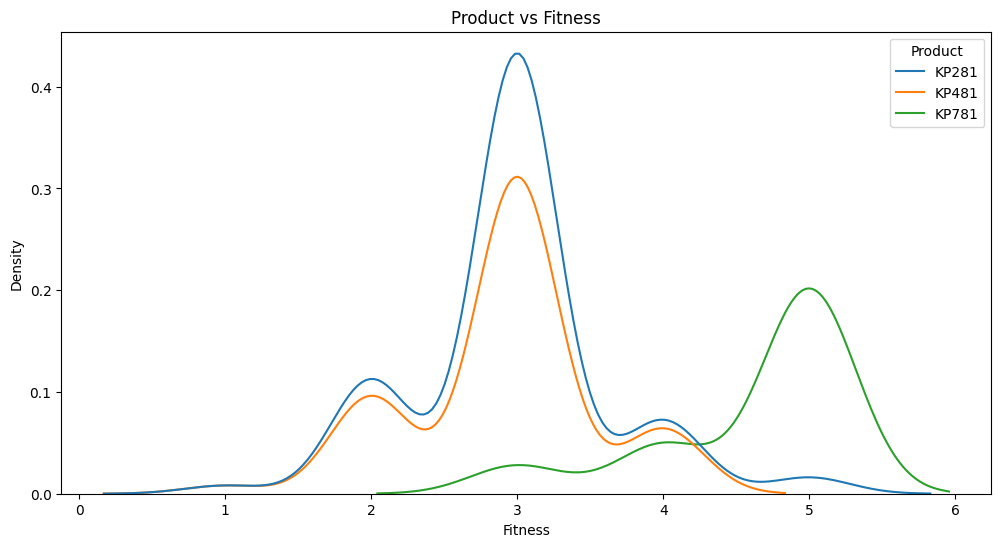

In [38]:
def productvsFitness(data):
  plt.figure(figsize=(12,6))
  sns.kdeplot(data=data, x='Fitness', hue='Product')
  title="Product vs Fitness"
  plt.title(title)
  plt.xlabel("Fitness")
  plt.show()

productvsFitness(aerofittm_df)

We have the fitness of the product KP281 and KP481 more due to higher spike

Product vs Income

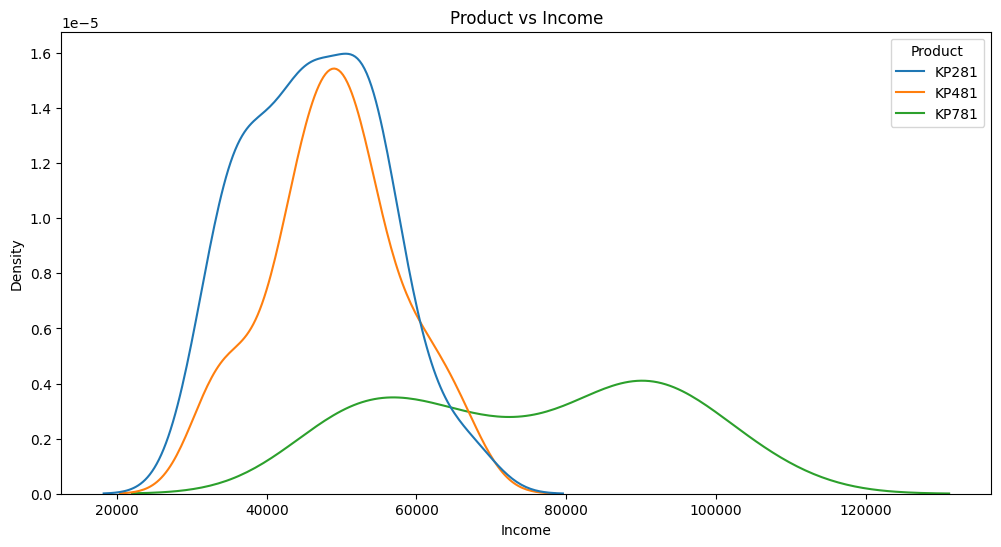

In [39]:
def productvsIncome(data):
  plt.figure(figsize=(12,6))
  sns.kdeplot(data=data, x='Income', hue='Product')
  title="Product vs Income"
  plt.title(title)
  plt.xlabel("Income")
  plt.show()

productvsIncome(aerofittm_df)

People who purchase the product KP281 and KP481 have higher spikes compared to KP781

Product vs Miles

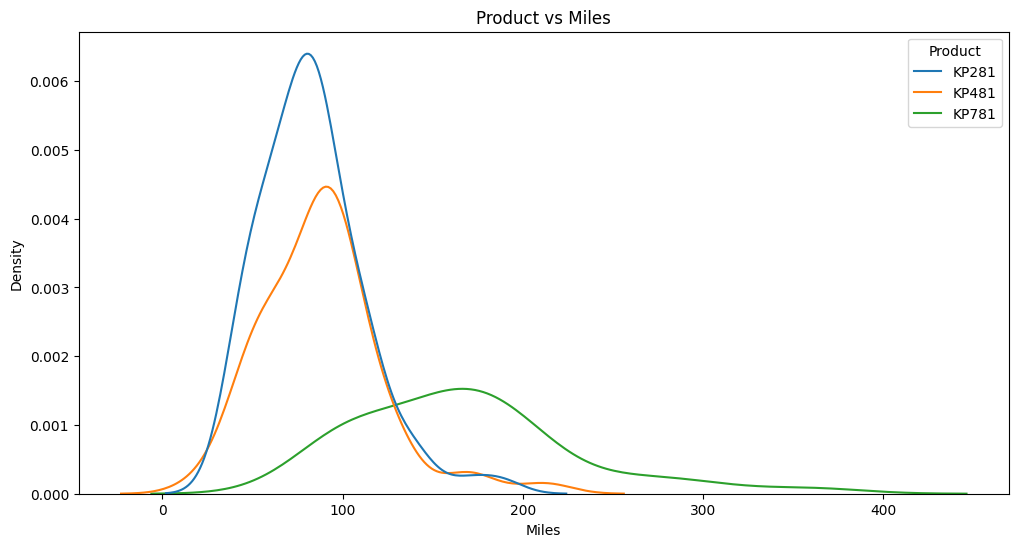

In [40]:
def productvsMiles(data):
  plt.figure(figsize=(12,6))
  sns.kdeplot(data=data, x='Miles', hue='Product')
  title="Product vs Miles"
  plt.title(title)
  plt.xlabel("Miles")
  plt.show()

productvsMiles(aerofittm_df)

People who purchase the product KP281 and KP481 have higher spikes in miles compared to KP781

Gender analysis done on the rest of the fields as mentioned below
*   Gender vs Usage
*   Gender vs Fitness
*   Gender vs Income
*   Gender vs Miles

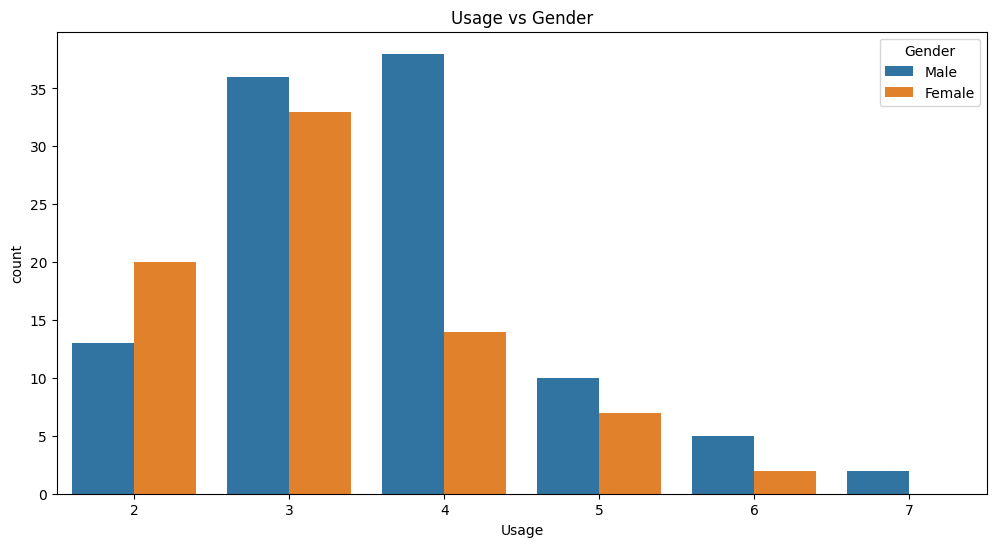

In [41]:
def Gendervsusage(data):
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='Usage', hue='Gender')
  title="Usage vs Gender"
  plt.title(title)
  plt.xlabel("Usage")
  plt.show()

Gendervsusage(aerofittm_df)

Among Male and Female Males usage higher in 4 days per week
Female customers mostly use 3 days per week
Only few Male customers use 7 days per week whereas female customers maximum usage is only 6 days per week

Gender vs Fitness

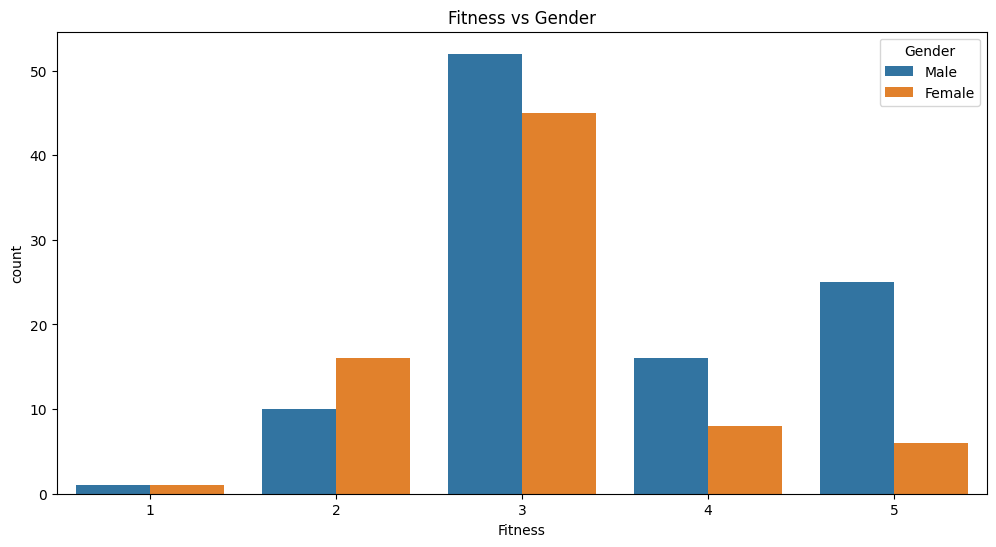

In [42]:
def GendervsFitness(data):
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='Fitness', hue='Gender')
  title="Fitness vs Gender"
  plt.title(title)
  plt.xlabel("Fitness")
  plt.show()

GendervsFitness(aerofittm_df)

We can see that Among Males and females males have higher average fitness
Even among the Average fitness that is 3 males are having higher than females

Gender vs Income

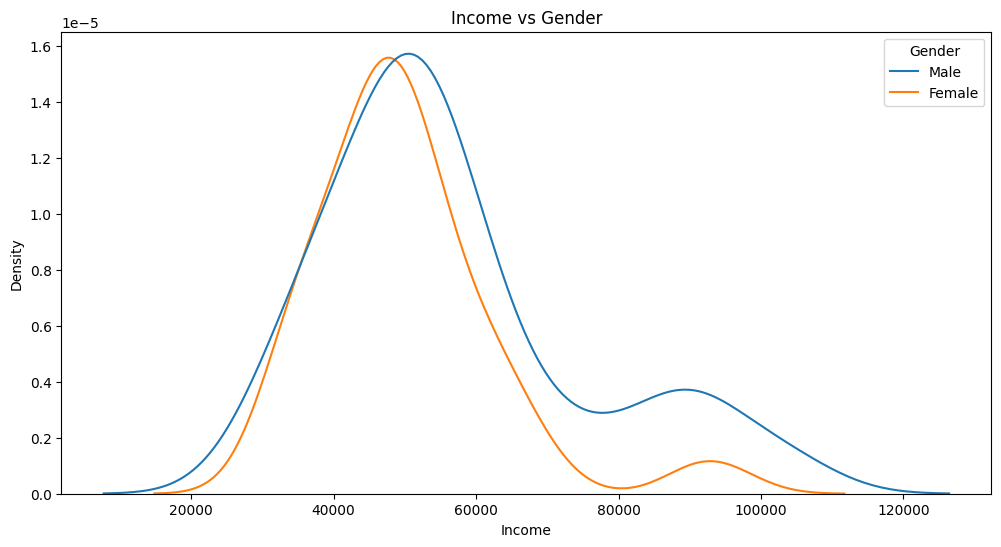

In [43]:
def GendervsIncome(data):
  plt.figure(figsize=(12,6))
  sns.kdeplot(data=data, x='Income', hue='Gender')
  title="Income vs Gender"
  plt.title(title)
  plt.xlabel("Income")
  plt.show()

GendervsIncome(aerofittm_df)

We can see that both male and female have equal higher or peak income in the range of 20K to 80K and peak of about 40K

Gender vs Miles

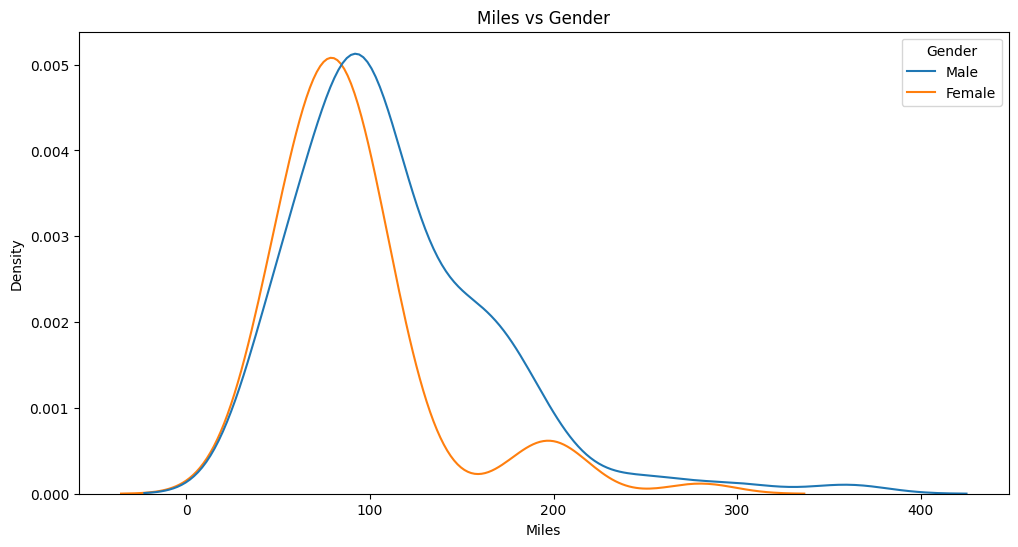

In [44]:
def GendervsMiles(data):
  plt.figure(figsize=(12,6))
  sns.kdeplot(data=data, x='Miles', hue='Gender')
  title="Miles vs Gender"
  plt.title(title)
  plt.xlabel("Miles")
  plt.show()

GendervsMiles(aerofittm_df)

Seems like over all males have a higher Mile range than female but they both peak at the same level

Analysis is on How Marital Status affects the rest of the values

*   Marital vs Usage
*   Marital vs Fitness
*   Marital vs Income
*   Marital vs Miles

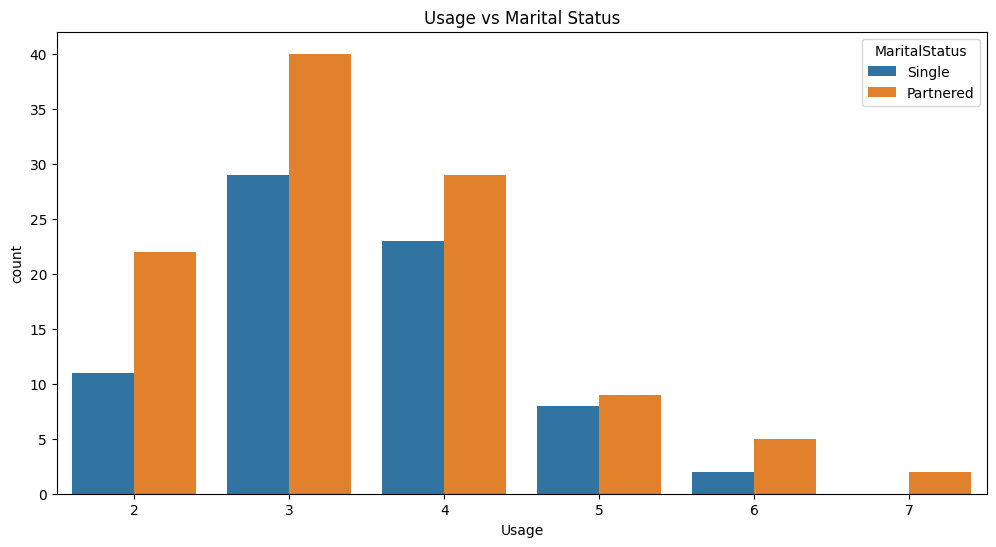

In [45]:
def Maritalvsusage(data):
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='Usage', hue='MaritalStatus')
  title="Usage vs Marital Status"
  plt.title(title)
  plt.xlabel("Usage")
  plt.show()

Maritalvsusage(aerofittm_df)

People who have married have an higher usuage value in 3 and people who are single tend to stop of the usage value of 6

Marital vs Fitness

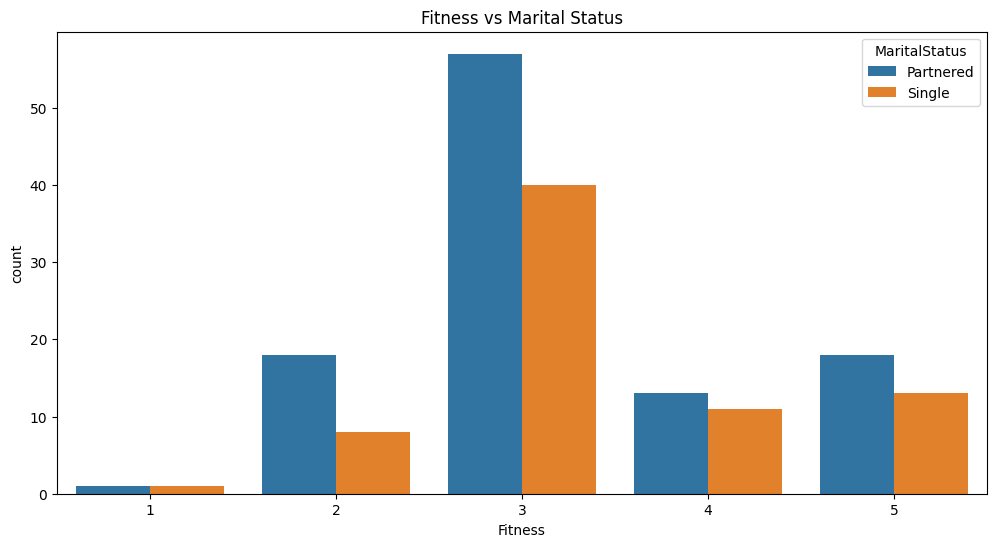

In [46]:
def MaritalvsFitness(data):
  plt.figure(figsize=(12,6))
  sns.countplot(data=data, x='Fitness', hue='MaritalStatus')
  title="Fitness vs Marital Status"
  plt.title(title)
  plt.xlabel("Fitness")
  plt.show()

MaritalvsFitness(aerofittm_df)

People who are single have a higher fitness in terms of average fitness that is 3

Marital vs Income

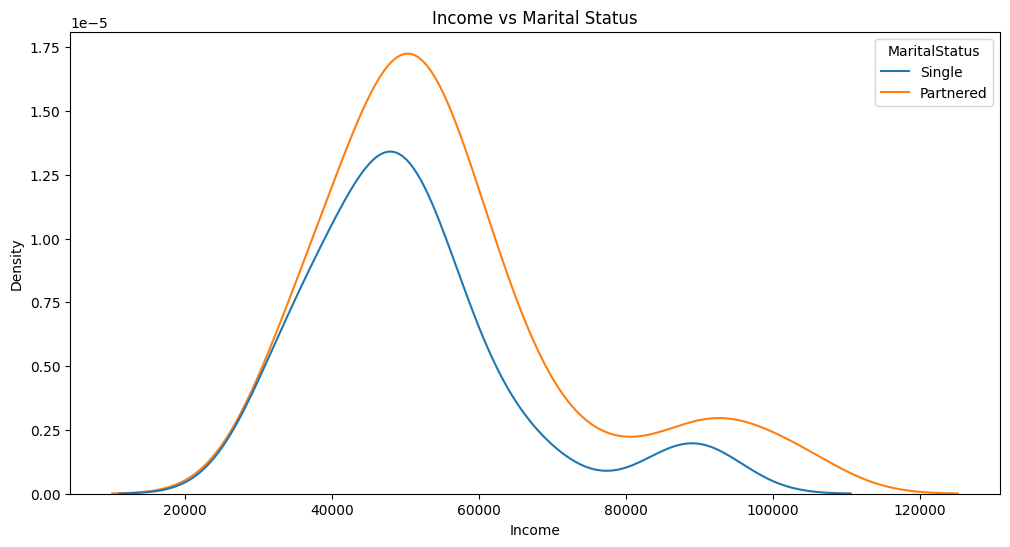

In [47]:
def MaritalvsIncome(data):
  plt.figure(figsize=(12,6))
  sns.kdeplot(data=data, x='Income', hue='MaritalStatus')
  title="Income vs Marital Status"
  plt.title(title)
  plt.xlabel("Income")
  plt.show()

MaritalvsIncome(aerofittm_df)

Parterned people have higher income in the range of 20K to 80K and peak at 45K

Marital vs Miles

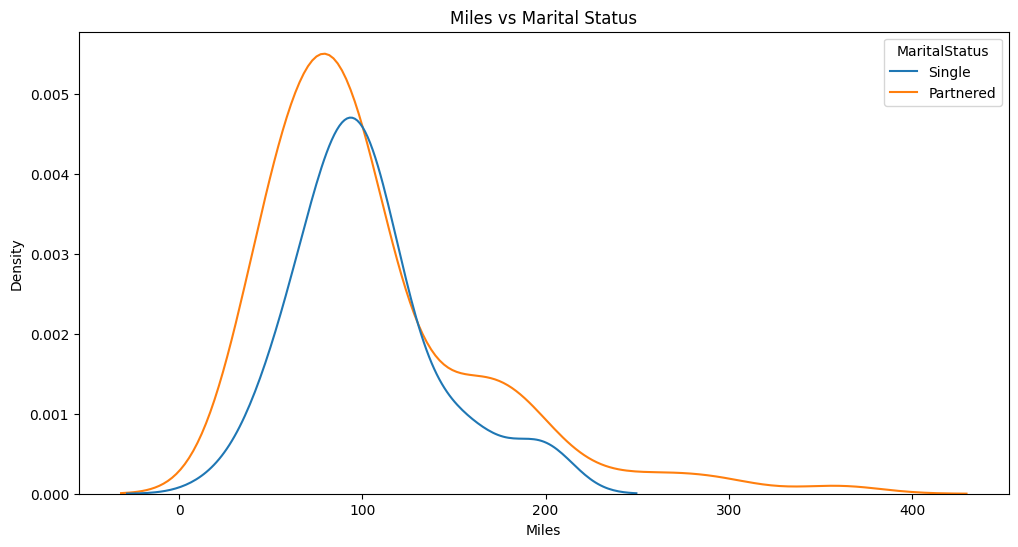

In [48]:
def MaritalvsMiles(data):
  plt.figure(figsize=(12,6))
  sns.kdeplot(data=data, x='Miles', hue='MaritalStatus')
  title="Miles vs Marital Status"
  plt.title(title)
  plt.xlabel("Miles")
  plt.show()

MaritalvsMiles(aerofittm_df)

Partnered people have higher Miles and peak at the value close to 90

# **Outlier Detection and probability**

Inter Quartile Range

In [52]:
def interquartilerange(data , coloumn):
  for i in coloumn:
    q1=np.percentile(data[i], 25)
    q3=np.percentile(data[i], 75)
    quartile = q3-q1
    print("The Inter Quartile Range of "+i+" is",quartile)


coloumn=['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
interquartilerange(aerofittm_df,coloumn)

The Inter Quartile Range of Age is 9.0
The Inter Quartile Range of Education is 2.0
The Inter Quartile Range of Usage is 1.0
The Inter Quartile Range of Fitness is 1.0
The Inter Quartile Range of Income is 14609.25
The Inter Quartile Range of Miles is 48.75


Probability of Product for given gender

In [57]:
probabilityofp=pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['Gender']],margins=True)
print(probabilityofp)
np.round(((pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['Gender']],margins=True))/180)*100,2)


Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180


Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


With the above data we can calculate the probability of each product with respect to the genders

Marginal Probability

Probability of Male Customer Purchasing product is 57.77

Probability of Female Customer Purchasing product is 42.22

Marginal Probability of any customer buying

product KP281 is : 44.44

product KP481 is : 33.33

product KP781 is : 22.22

In [58]:
np.round((pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['Gender']],margins=True, normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


Probability of Selling Product

p(KP281|Female) = 52
p(KP481|Female) = 38
p(KP781|Female) = 10
p(KP281|male) = 38
p(KP481|male) = 30
p(KP781|male) = 32

Probability of product given MaritalStatus

In [59]:
probabilityofg=pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['MaritalStatus']],margins=True)
print(probabilityofg)
np.round(((pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['MaritalStatus']],margins=True))/180)*100,2)

MaritalStatus  Partnered  Single  All
Product                              
KP281                 48      32   80
KP481                 36      24   60
KP781                 23      17   40
All                  107      73  180


MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
All,59.44,40.56,100.00


Marginal Probability

Probability of Married Customer Purchasingproduct is 59.44

Probability of Single Customer Purchasing product is 40.56

Marginal Probability of any customer buying

product KP281 is : 44.44

product KP481 is : 33.33

product KP781 is : 22.22

In [60]:
np.round((pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['MaritalStatus']],margins=True, normalize="columns"))*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,44.86,43.84,44.44
KP481,33.64,32.88,33.33
KP781,21.50,23.29,22.22


Probability of Selling Product

p(KP281|Married) = 44.86
p(KP481|Married) = 33.64
p(KP781|Married) = 21.50
p(KP281|Single) = 43.84
p(KP481|Single) = 32.88
p(KP781|Single) = 23.29

Probability of a product given Fitness category

In [63]:
probabilityoffg=pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['Fitness_category']],margins=True)
print(probabilityoffg)
np.round(((pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['Fitness_category']],margins=True))/180)*100,2)

Fitness_category  Average  Good  Poor  Very Good  Very Poor  All
Product                                                         
KP281                  54     9    14          2          1   80
KP481                  39     8    12          0          1   60
KP781                   4     7     0         29          0   40
All                    97    24    26         31          2  180


Fitness_category,Average,Good,Poor,Very Good,Very Poor,All
Product,,,,,,
KP281,30.00,5.00,7.78,1.11,0.56,44.44
KP481,21.67,4.44,6.67,0.00,0.56,33.33
KP781,2.22,3.89,0.00,16.11,0.00,22.22
All,53.89,13.33,14.44,17.22,1.11,100.00


Marginal Probability

Probability of Fitness Customer of customer as average Purchasing product is 53.89
Probability of Fitness Customer of customer as Good Purchasing product is 13.33
Probability of Fitness Customer of customer as Poor Purchasing product is 14.44
Probability of Fitness Customer of customer as Very Good Purchasing product is 17.22
Probability of Fitness Customer of customer as Very Poor Purchasing product is 1.11

Marginal Probability of any customer buying

product KP281 is : 44.44
product KP481 is : 33.33
product KP781 is : 22.22

In [64]:
np.round((pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['Fitness_category']],margins=True, normalize="columns"))*100,2)

Fitness_category,Average,Good,Poor,Very Good,Very Poor,All
Product,,,,,,
KP281,55.67,37.50,53.85,6.45,50.0,44.44
KP481,40.21,33.33,46.15,0.00,50.0,33.33
KP781,4.12,29.17,0.00,93.55,0.0,22.22


Probability of Selling Product

p(KP281|Average) = 55.67
p(KP481|Average) = 40.21
p(KP781|Average) = 4.12
p(KP281|Good) = 37.50
p(KP481|Good) = 33.33
p(KP781|Good) = 29.17
p(KP281|Poor) = 53.85
p(KP481|Poor) = 46.15
p(KP781|Poor) = 0
p(KP281|Very Good) = 6.45
p(KP481|Very Good) = 0
p(KP781|Very Good) = 93.55
p(KP281|Very Poor) = 50
p(KP481|Very Poor) = 50
p(KP781|Very Poor) = 0

Probability of a product given Age category

In [65]:
probabilityoffg=pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['Age_Category']],margins=True)
print(probabilityoffg)
np.round(((pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['Age_Category']],margins=True))/180)*100,2)

Age_Category  Adolescent  Young Adult  Adult  Middle-Aged  All
Product                                                       
KP281                 10           17     36           17   80
KP481                  7           10     31           12   60
KP781                  0           10     23            7   40
All                   17           37     90           36  180


Age_Category,Adolescent,Young Adult,Adult,Middle-Aged,All
Product,,,,,
KP281,5.56,9.44,20.00,9.44,44.44
KP481,3.89,5.56,17.22,6.67,33.33
KP781,0.00,5.56,12.78,3.89,22.22
All,9.44,20.56,50.00,20.00,100.00


Marginal Probability

Probability of Age of customer as Adolocent Purchasing product is 9.44
Probability of Age of customer as Young Adult Purchasing product is 20.56
Probability of Age of customer as Adult Purchasing product is 50
Probability of Age of customer as Middle Aged Purchasing product is 20


Marginal Probability of any customer buying

product KP281 is : 44.44
product KP481 is : 33.33
product KP781 is : 22.22

In [66]:
np.round((pd.crosstab(index=aerofittm_df['Product'],columns=[aerofittm_df['Age_Category']],margins=True, normalize="columns"))*100,2)

Age_Category,Adolescent,Young Adult,Adult,Middle-Aged,All
Product,,,,,
KP281,58.82,45.95,40.00,47.22,44.44
KP481,41.18,27.03,34.44,33.33,33.33
KP781,0.00,27.03,25.56,19.44,22.22


Probability of Selling Product

p(KP281|Adolescent) = 58.82
p(KP481|Adolescent) = 41.18
p(KP781|Adolescent) = 0
p(KP281|Young Adult) = 45.95
p(KP481|Young Adult) = 27.03
p(KP781|Young Adult) = 27.03
p(KP281|Adult) = 40.00
p(KP481|Adult) = 34.44
p(KP781|Adult) = 25.56
p(KP281|Middle Aged) = 47.22
p(KP481|Middle Aged) = 33.33
p(KP781|Middle Aged) = 19.44

Recommendations


Promote Customers to upgrade from lower versions to next level versions after consistent usages as there are very less people in the usage after 5 category so improvements can be pushed.

Married people prefer product KP281 more and this can be used as our advantage to have marketing done on these products for couples as exercise together to increase the sales.

Female who prefer exercising is low here as  compared to males. we should run a marketing campaign on to encourage women to exercise more

KP281 & KP481 treadmills are preferred by the customers as this is the most used and most of the people income lies around 45K so these models need to be put on offers or sales to increase the products.

As KP781 is better and advanced (based on the data that the male use this product more and is extensively used by higher fitness people) this treadmill should be marketed for professionals and athletes.

KP781 product should be promoted using influencers and other athletes.

KP781 can be recommended for Female customers who exercises extensively as this variant is preferred less.

Market the Adolescents to use the more of KP281 and provide its health benefits.

Target the Age group above 40 years to recommend Product KP781.